In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

### Setting up the parameters and equations for RSSI calculations


In [2]:
# Dimensions of the building 
x = 100
y = 60
z = 5
tile_index = 1
#Device 1 coordinates
d1_coord = np.array([0,30,3])
#Device 2 coordinates
d2_coord = np.array([50,60,4])
#Device 3 coordinates
d3_coord = np.array([100,30,3])
#path loss parameter 
n = 4
# Average RSSI at one meter from transmitter
A = -50
# Standard Deviation 
sd = 5.1
# Function for euqation 1
def equation_1(d):
    RSSI = round(-10*n*np.log10(d) + A + np.random.normal(loc=0,scale=sd),4)
    return RSSI
#Function for equation 2
def equation_2(d):
    RSSI = round(-10*n*np.log10(d) + A,4)
    return RSSI


## 1. Creating RSSI profile from d = 1 to 140m using equation 2

In [3]:
RSSI = [0]*140 # initialize empty array of size 140 to store 140 RSSI values
for d in range(1,141): # d ranges from 1-140
    RSSI[d-1] = equation_2(d) # using equation 2

Text(0.5, 0, 'Distance (meters)')

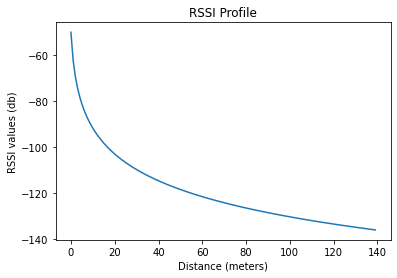

In [4]:
plt.plot(RSSI)
plt.title("RSSI Profile")
plt.ylabel("RSSI values (db)")
plt.xlabel ("Distance (meters)")

#### Thus from the above plot it can be inferred that the RSSI value logarithmically decreases with distance

## 2. Generating fingerprint for TileGrid

#### Given Instructions
 1. The floor of the building is a grid of equal size square-tiles, thus there are 100*60 = 6000 tiles
 2. Since the tiles are on the floor, the value is Z = 0 for each tile
 3. Using  centre of tile for RSSI computation. Thus the coordinates for 1st tile is (0.5,0.5,0) and last tile is (99.5,59.5,0)

In [5]:
# Generating the coordinates of the tiles 
z = 0
tiles_coordinates = [0]*6000 
count = 0
for i in range(1,101):
    for j in range(1,61):
        # calculating the centre coordinate of each tile 
        x = i - 0.5
        y = j - 0.5
        tiles_coordinates[count] = np.array([x,y,z])
        count+=1
print("last tile center coordinates are",tiles_coordinates[5999])
print("Thus the centers of all the tiles are computed")

last tile center coordinates are [99.5 59.5  0. ]
Thus the centers of all the tiles are computed


In [6]:
# Calculating RSSI values for all the tiles 
RSSI_values_per_tile = [0]*6000 #since there are 600 tiles
RSSI_Device_1 = [0]*6000
RSSI_Device_2 = [0]*6000
RSSI_Device_3 = [0]*6000
for t in range(1,len(tiles_coordinates)+1):
    #RSSI from device 1 
    d1 = distance.euclidean(tiles_coordinates[t-1],d1_coord)
    RSSI_Device_1[t-1] = equation_1(d1)
    #RSSI from device 2
    d2 = distance.euclidean(tiles_coordinates[t-1],d2_coord)
    RSSI_Device_2[t-1]= equation_1(d2)
    #RSSI from device 3
    d3 = distance.euclidean(tiles_coordinates[t-1],d3_coord)
    RSSI_Device_3[t-1]= equation_1(d3)
    RSSI_values_per_tile[t-1] = np.array([RSSI_Device_1[t-1],RSSI_Device_2[t-1],RSSI_Device_3[t-1]])

In [7]:
print("The RSSI values of the first five tiles are:")
RSSI_values_per_tile[:6]

The RSSI values of the first five tiles are:


[array([-109.5405, -132.5281, -123.5136]),
 array([-106.6605, -125.785 , -134.0054]),
 array([-100.2651, -122.8132, -124.255 ]),
 array([-105.5749, -126.8265, -127.5231]),
 array([-112.5668, -130.0189, -128.3321]),
 array([-108.9975, -125.0474, -135.4422])]

## 3. Estimating RSSI readings for co-ordinate(30,45,0) from all the 3 devices

In [8]:
loc = np.array([30,45,0])
d1 = distance.euclidean(loc,d1_coord)
rs1 = equation_1(d1) # RSSI from device 1
d2 = distance.euclidean(loc,d2_coord)
rs2 =equation_1(d2)#RSSI from device 2
d3 = distance.euclidean(loc,d3_coord)
rs3 =  equation_1(d3)# RSSi from device 3
RSSI_Detect = np.array([rs1,rs2,rs3])
print("The RSSI Value from device 1 is :",rs1)
print("The RSSI Value from device 2 is :",rs2)
print("The RSSI Value from device 3 is :",rs3)

The RSSI Value from device 1 is : -111.5573
The RSSI Value from device 2 is : -110.1501
The RSSI Value from device 3 is : -121.7626


## 4. Computing the mean location of the by using RSSI values of tiles fingerprint

In [9]:
mean_location = []
tiles_loc = [0]*10
#iterating 10 times 
for i in range(1,11):
    d1 = distance.euclidean(loc,d1_coord)
    rs1 = equation_1(d1) # RSSI from device 1
    dev_1 = np.reshape(np.abs(RSSI_Device_1-rs1),(100,60))
    #Searching for min difference in RSSI values w.r.t Device 1
    loc_1 = np.where(dev_1==np.min(dev_1))
    mean_location.append([loc_1[0][0],loc_1[1][0]])
    d2 = distance.euclidean(loc,d2_coord)
    rs2 =equation_1(d2)#RSSI from device 2
    dev_2 = np.reshape(np.abs(RSSI_Device_2-rs2),(100,60))
    #Searching for min difference in RSSI values w.r.t Device 2
    loc_2 = np.where(dev_2==np.min(dev_2))
    mean_location.append([loc_2[0][0],loc_2[1][0]])
    d3 = distance.euclidean(loc,d3_coord)
    rs3 =  equation_1(d3)# RSSi from device 3
    dev_3 = np.reshape(np.abs(RSSI_Device_3 - rs3),(100,60))
    #Searching for min difference in RSSI values w.r.t Device 3
    loc_3 = np.where(dev_3==np.min(dev_3))
    mean_location.append([loc_3[0][0],loc_3[1][0]])

In [10]:
#Calculating the mean location value by taking the averages of the coordinates 
final_location = (np.sum(np.array(mean_location),axis=0)/30).astype(int)
final_location=np.append(final_location,0)
print("The approximate x-coordinates are:",final_location[0])
print("The approximate y-coordinates are:",final_location[1])
print("The approximate z-coordinates are:",final_location[2])

The approximate x-coordinates are: 36
The approximate y-coordinates are: 34
The approximate z-coordinates are: 0


## 5. Calculating the Location Error

In [11]:
location_error = np.round(np.linalg.norm(loc-final_location),3)
print("The location error is:",location_error,"meters")

The location error is: 12.53 meters


#### From the above values it can be seen that the location is not very accurate. The accuracy can be improved by using the trangulation technique

## 6. Triangulation Method to estimate the location of the Roaming Device 

#### In this method we use simple trignometry to find the intersection of the 3 circles to estimate the best location of our roaming device. The iteration is done 10 times to compute the average. It can be illustrated as follows :
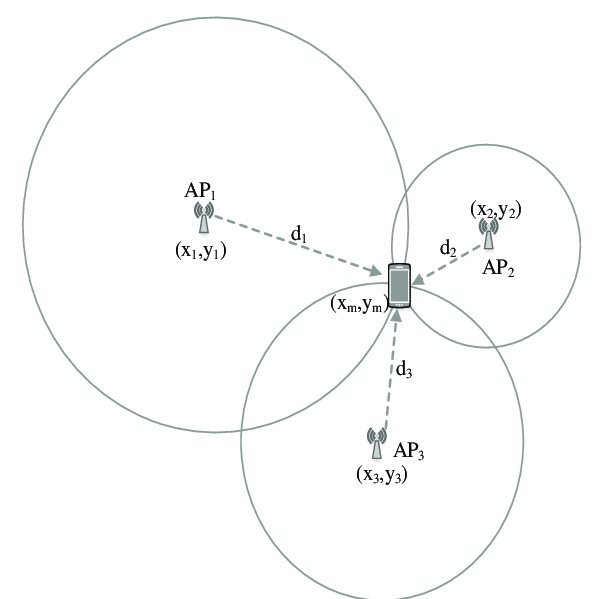

In [68]:
index_per_iteration = []
for i in range(1,11):
    d1 = distance.euclidean(loc,d1_coord)
    rs1 = equation_1(d1) # RSSI from device 1
    dev_1 = np.reshape(np.abs(RSSI_Device_1-rs1),(100,60))
    d2 = distance.euclidean(loc,d2_coord)
    rs2 =equation_1(d2)#RSSI from device 2
    dev_2 = np.reshape(np.abs(RSSI_Device_2-rs2),(100,60)) 
    d3 = distance.euclidean(loc,d3_coord)
    rs3 =equation_1(d3)#RSSI from device 2
    dev_3 = np.reshape(np.abs(RSSI_Device_3-rs3),(100,60)) 
    dev = dev_1+dev_2+dev_3
    index_per_iteration.append(np.unravel_index(np.argmin(dev,axis=None),dev_1.shape))
#Calculating the estimated location 
estimated_location = (np.sum(np.array(index_per_iteration),axis=0)/10).astype(int)
estimated_location = np.append(estimated_location,0)
print("Estimated LOcation of X-coordinate is:",estimated_location[0])
print("Estimated LOcation of Y-coordinate is:",estimated_location[1])
print("Estimated LOcation of Z-coordinate is:",estimated_location[2])
estimated_error = np.round(np.linalg.norm(loc-estimated_location),3)
print("Estimated Error is:",estimated_error,"meters")

Estimated LOcation of X-coordinate is: 33
Estimated LOcation of Y-coordinate is: 42
Estimated LOcation of Z-coordinate is: 0
Estimated Error is: 4.243 meters


#### Thus from the above results it can be seen that triangulation method yields better results

In [71]:
efficiency_comparision = (np.abs(location_error-estimated_error)/location_error)*100

In [75]:
print("The triangulation method is efficient by:",np.round(efficiency_comparision,2),"%")

The triangulation method is efficient by: 66.14 %
